## Imports

In [37]:
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

## Task 1:

Your current goal is get familiar with the data you were given, so in this task you should create a notebook that would show all data you have

In [38]:
df_item_categories = pd.read_csv("data/item_categories.csv")
df_items = pd.read_csv("data/items.csv")
df_sales_train = pd.read_csv("data/sales_train.csv")
df_sample_submission = pd.read_csv("data/sample_submission.csv")
df_shops = pd.read_csv("data/shops.csv")
df_test = pd.read_csv("data/test.csv")

items = df_items.merge(df_item_categories, how="left", on="item_category_id", validate="m:1")
sales_train = df_sales_train.merge(df_shops, how="left", on="shop_id", validate="m:1")
sales_train = sales_train.merge(items, how="left", on="item_id", validate="m:m")
sales_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 10 columns):
 #   Column              Dtype  
---  ------              -----  
 0   date                object 
 1   date_block_num      int64  
 2   shop_id             int64  
 3   item_id             int64  
 4   item_price          float64
 5   item_cnt_day        float64
 6   shop_name           object 
 7   item_name           object 
 8   item_category_id    int64  
 9   item_category_name  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 224.0+ MB


### Sold items per shop

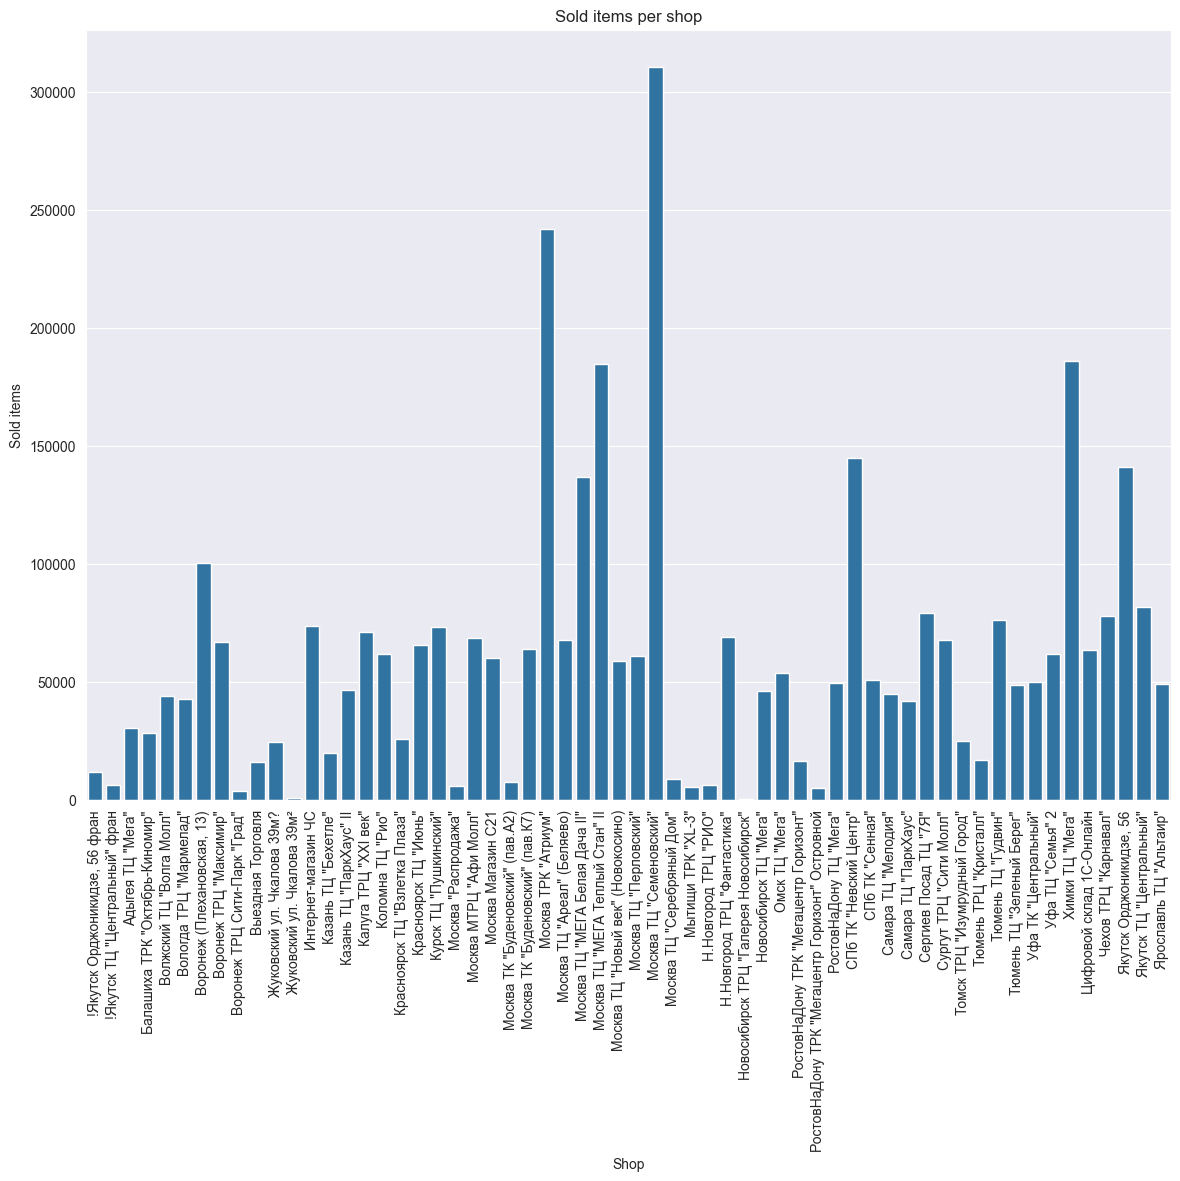

In [39]:
sold_items_per_shop = sales_train.groupby("shop_name")["item_cnt_day"].sum().reset_index()
plt.figure(figsize=(14,10))
sns.barplot(sold_items_per_shop, x="shop_name", y="item_cnt_day")
plt.title("Sold items per shop")
plt.ylabel("Sold items")
plt.xlabel("Shop")
plt.xticks(rotation=90)
plt.show()

### Sold items per category

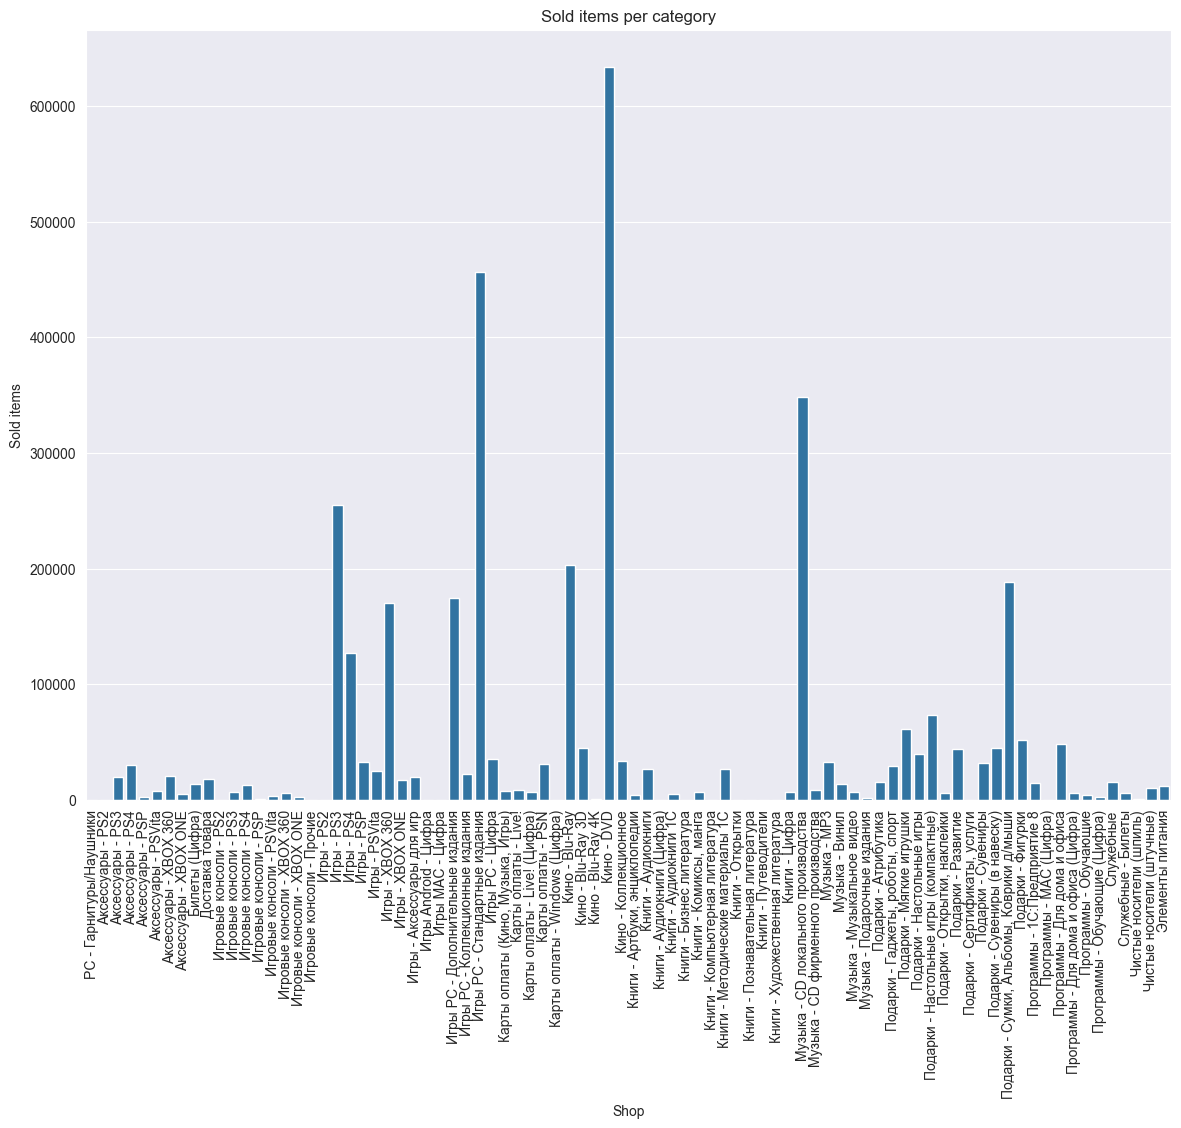

In [40]:
sold_items_per_category = sales_train.groupby("item_category_name")["item_cnt_day"].sum().reset_index()
plt.figure(figsize=(14,10))
sns.barplot(sold_items_per_category, x="item_category_name", y="item_cnt_day")
plt.title("Sold items per category")
plt.ylabel("Sold items")
plt.xlabel("Shop")
plt.xticks(rotation=90)
plt.show()

### Monthly sales

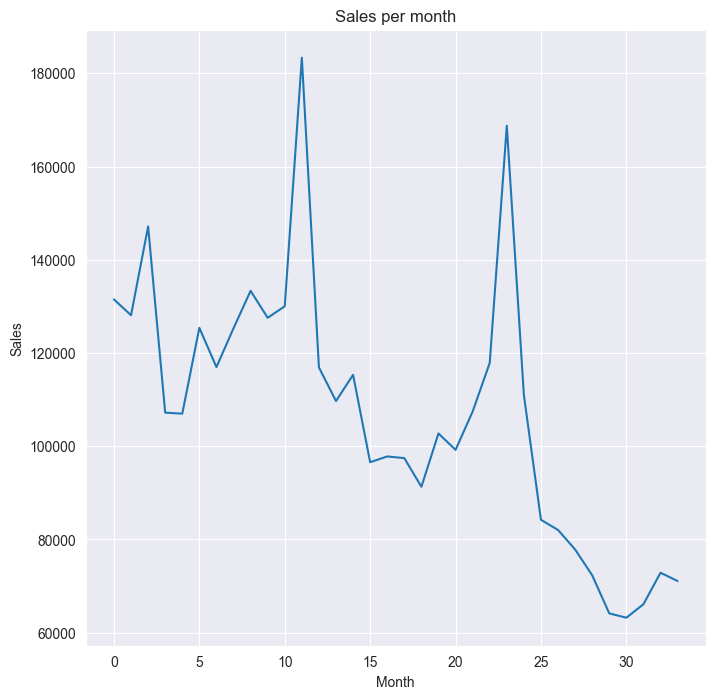

In [41]:
sales_per_month = sales_train.groupby("date_block_num")["item_cnt_day"].sum().reset_index()
plt.figure(figsize=(8,8))
sns.lineplot(sales_per_month, x="date_block_num", y="item_cnt_day")
plt.title("Sales per month")
plt.ylabel("Sales")
plt.xlabel("Month")
plt.show()

### Shop's monthly sales

In [42]:
sales_train["shop_name"].unique()

array(['Ярославль ТЦ "Альтаир"', 'Москва ТРК "Атриум"',
       'Москва ТК "Буденовский" (пав.К7)',
       'Москва ТК "Буденовский" (пав.А2)', 'Курск ТЦ "Пушкинский"',
       'Москва Магазин С21', 'Красноярск ТЦ "Июнь"',
       'Москва МТРЦ "Афи Молл"', 'Москва ТЦ "МЕГА Теплый Стан" II',
       'Москва ТЦ "МЕГА Белая Дача II"',
       'Москва ТЦ "Новый век" (Новокосино)',
       'Москва ТЦ "Ареал" (Беляево)', 'Волжский ТЦ "Волга Молл"',
       'Воронеж (Плехановская, 13)', 'Адыгея ТЦ "Мега"',
       'Балашиха ТРК "Октябрь-Киномир"', 'Воронеж ТРЦ "Максимир"',
       '!Якутск Орджоникидзе, 56 фран', '!Якутск ТЦ "Центральный" фран',
       'Коломна ТЦ "Рио"', 'Калуга ТРЦ "XXI век"',
       'Воронеж ТРЦ Сити-Парк "Град"', 'Жуковский ул. Чкалова 39м?',
       'Казань ТЦ "ПаркХаус" II', 'Казань ТЦ "Бехетле"',
       'Интернет-магазин ЧС', 'Уфа ТЦ "Семья" 2',
       'Москва ТЦ "Семеновский"', 'Москва ТЦ "Перловский"',
       'Москва ТЦ "Серебряный Дом"', 'Н.Новгород ТРЦ "Фантастика"',
       '

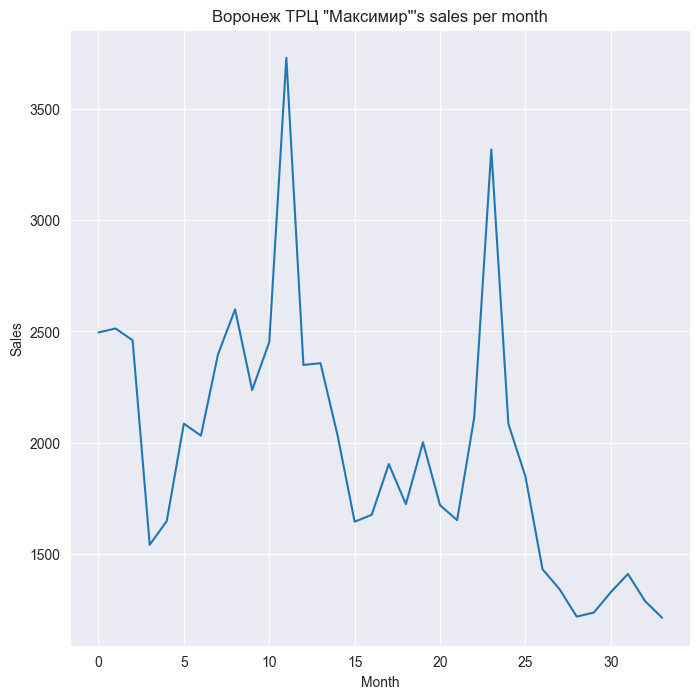

In [43]:
shop = 'Воронеж ТРЦ "Максимир"'
sales_per_month = sales_train[sales_train["shop_name"] == shop].groupby("date_block_num")["item_cnt_day"].sum().reset_index()
plt.figure(figsize=(8,8))
sns.lineplot(sales_per_month, x="date_block_num", y="item_cnt_day")
plt.title(f"{shop}'s sales per month")
plt.ylabel("Sales")
plt.xlabel("Month")
plt.show()

### Shop's monthly sales by category

In [44]:
df_item_categories["item_category_name"].unique()

array(['PC - Гарнитуры/Наушники', 'Аксессуары - PS2', 'Аксессуары - PS3',
       'Аксессуары - PS4', 'Аксессуары - PSP', 'Аксессуары - PSVita',
       'Аксессуары - XBOX 360', 'Аксессуары - XBOX ONE', 'Билеты (Цифра)',
       'Доставка товара', 'Игровые консоли - PS2',
       'Игровые консоли - PS3', 'Игровые консоли - PS4',
       'Игровые консоли - PSP', 'Игровые консоли - PSVita',
       'Игровые консоли - XBOX 360', 'Игровые консоли - XBOX ONE',
       'Игровые консоли - Прочие', 'Игры - PS2', 'Игры - PS3',
       'Игры - PS4', 'Игры - PSP', 'Игры - PSVita', 'Игры - XBOX 360',
       'Игры - XBOX ONE', 'Игры - Аксессуары для игр',
       'Игры Android - Цифра', 'Игры MAC - Цифра',
       'Игры PC - Дополнительные издания',
       'Игры PC - Коллекционные издания', 'Игры PC - Стандартные издания',
       'Игры PC - Цифра', 'Карты оплаты (Кино, Музыка, Игры)',
       'Карты оплаты - Live!', 'Карты оплаты - Live! (Цифра)',
       'Карты оплаты - PSN', 'Карты оплаты - Windows (Цифра)',

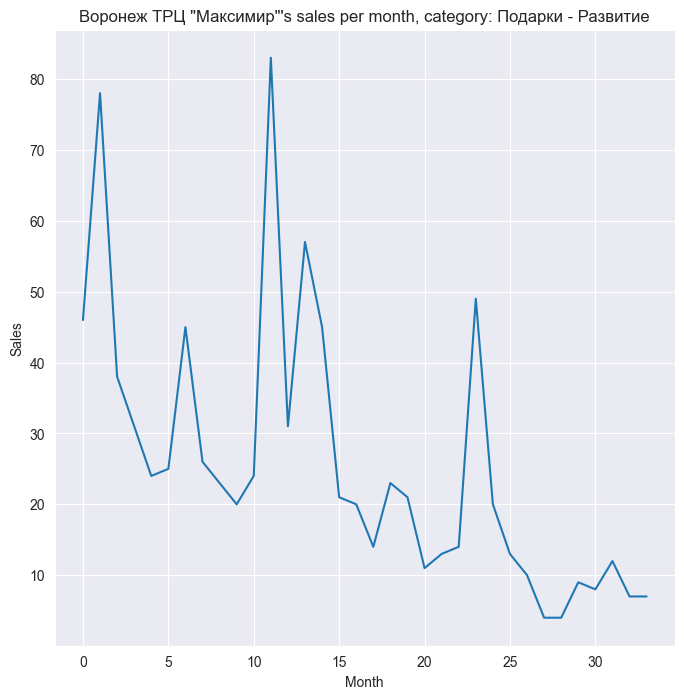

In [45]:
shop = 'Воронеж ТРЦ "Максимир"'
category = 'Подарки - Развитие'
shop_sales_per_month_by_category = sales_train[(sales_train["shop_name"] == shop) & (sales_train["item_category_name"] == category)].groupby("date_block_num")["item_cnt_day"].sum().reset_index()
plt.figure(figsize=(8,8))
plt.title(f"{shop}'s sales per month, category: {category}")
plt.ylabel("Sales")
plt.xlabel("Month")
sns.lineplot(shop_sales_per_month_by_category, x="date_block_num", y="item_cnt_day")
plt.show()

## Task 2
The second task is Data Quality Check layer. Since you would work a lot with your data, it would be useful to create a dqc notebook that would be used to mark all possible issues that your data have:
* Outliers
* Poor dynamic all a lot of missing information
* Data inconsistency

In [46]:
import pandas as pd
import numpy as np

class DQC:
    def __init__(self):
        self.processors = [
            DQC.mark_missing_values,
            DQC.mark_incorrect_data,
            DQC.mark_outliers
        ]

    def process(self, row_data: pd.DataFrame) -> pd.DataFrame:
        df: pd.DataFrame = row_data.copy()
        df = df.drop_duplicates()

        for processor in self.processors:
            df = processor(df)

        return df

    @staticmethod
    def mark_missing_values(row_data: pd.DataFrame) -> pd.DataFrame:
        missing_count = row_data.isna().sum(axis=1)
        row_data["missing_values_count"] = missing_count
        return row_data

    @staticmethod
    def mark_outliers(row_data: pd.DataFrame) -> pd.DataFrame:
        columns = row_data.select_dtypes(include=np.number).columns.tolist()

        outlier_mask = pd.Series([False] * len(row_data), index=row_data.index)

        for column in columns:
            Q1 = row_data[column].quantile(0.25)
            Q3 = row_data[column].quantile(0.75)
            IQR = Q3 - Q1

            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            column_outlier_mask = (row_data[column] < lower_bound) | (row_data[column] > upper_bound)

            outlier_mask = outlier_mask | column_outlier_mask

        row_data["is_outlier"] = outlier_mask
        return row_data

    @staticmethod
    def mark_incorrect_data(row_data: pd.DataFrame) -> pd.DataFrame:
        df = row_data.copy()

        df["is_incorrect_date"] = ~row_data["date"].str.match(r"\d{2}\.\d{2}\.\d{4}")
        df["is_incorrect_date_block_num"] = row_data["date_block_num"] < 0
        df["is_incorrect_shop_id"] = row_data["shop_id"] < 0
        df["is_incorrect_item_id"] = row_data["item_id"] < 0
        df["is_incorrect_item_price"] = row_data["item_price"] < 0
        df["is_incorrect_item_cnt_day"] = row_data["item_cnt_day"] < 0
        df["is_incorrect_item_category_id"] = row_data["item_category_id"] < 0

        return df


### Shops, Items and Categories

It needs to check for unique id and name.

In [47]:
print(f"Shops count: {len(df_shops)}, unique ids: {df_shops['shop_id'].nunique()}")
print(f"Items count: {len(df_items)}, unique ids: {df_items['item_id'].nunique()}")
print(f"Categories count: {len(df_item_categories)}, unique ids: {df_item_categories['item_category_id'].nunique()}")

Shops count: 60, unique ids: 60
Items count: 22170, unique ids: 22170
Categories count: 84, unique ids: 84


In [48]:
print(f"Shop names: {df_shops['shop_name'].nunique()}, duplicate names: {df_shops['shop_name'].duplicated().sum()}")
print(f"Shop names: {df_items['item_name'].nunique()}, duplicate names: {df_items['item_name'].duplicated().sum()}")
print(f"Shop names: {df_item_categories['item_category_id'].nunique()}, duplicate names: {df_item_categories['item_category_id'].duplicated().sum()}")


Shop names: 60, duplicate names: 0
Shop names: 22170, duplicate names: 0
Shop names: 84, duplicate names: 0


### Missing values, Outliers and Incorrect data

In [49]:
dqc = DQC()
processed_data = dqc.process(sales_train)

In [50]:
records_count = processed_data.shape[0]

missing_values_count = processed_data['missing_values_count'].sum()
outlier_count = processed_data['is_outlier'].sum()
incorrect_dates_count = processed_data['is_incorrect_date'].sum()
incorrect_date_block_num_count = processed_data['is_incorrect_date_block_num'].sum()
incorrect_shop_id_count = processed_data['is_incorrect_shop_id'].sum()
incorrect_item_id_count = processed_data['is_incorrect_item_id'].sum()
incorrect_item_price_count = processed_data['is_incorrect_item_price'].sum()
incorrect_item_cnt_day_count = processed_data['is_incorrect_item_cnt_day'].sum()
incorrect_item_category_id_count = processed_data['is_incorrect_item_category_id'].sum()

print(f"Missing values count: {missing_values_count} / {missing_values_count / records_count * 100}%")
print(f"Outliers count: {outlier_count} / {outlier_count / records_count * 100}%")
print(f"Incorrect dates count: {incorrect_dates_count} / {incorrect_dates_count / records_count * 100}%")
print(f"Incorrect months count: {incorrect_date_block_num_count} / {incorrect_date_block_num_count / records_count * 100}%")
print(f"Incorrect shop's ids count: {incorrect_shop_id_count} / {incorrect_shop_id_count / records_count * 100}%")
print(f"Incorrect item's ids count: {incorrect_item_id_count} / {incorrect_item_id_count / records_count * 100}%")
print(f"Incorrect item's prices count: {incorrect_item_price_count} / {incorrect_item_price_count / records_count * 100}%")
print(f"Incorrect sold items count: {incorrect_item_cnt_day_count} / {incorrect_item_cnt_day_count / records_count * 100}%")
print(f"Incorrect category's ids count: {incorrect_item_category_id_count} / {incorrect_item_category_id_count / records_count * 100}%")

Missing values count: 0 / 0.0%
Outliers count: 523230 / 17.822138309167077%
Incorrect dates count: 0 / 0.0%
Incorrect months count: 0 / 0.0%
Incorrect shop's ids count: 0 / 0.0%
Incorrect item's ids count: 0 / 0.0%
Incorrect item's prices count: 1 / 3.4061766926909916e-05%
Incorrect sold items count: 7356 / 0.25055835751434935%
Incorrect category's ids count: 0 / 0.0%


## ETL classes (Task 4)

### Extractor:

Extract row data from a source, also check for file existing and file extension.

In [51]:
class Extractor:
    def __init__(self, source: str):
        self.source = source

    def __call__(self) -> pd.DataFrame:
        assert os.path.exists(self.source), Exception(f"There is no file named '{self.source}'.")
        assert os.path.splitext(self.source)[1] == ".csv", Exception(f"Unsupported file extension '{self.source}'.")

        row_data = pd.read_csv(self.source)
        return row_data

### Transformer:

Transformer specification is to transform data into valid state. It includes:

- Normalization,
- Standardization,
- Empty values handling,
- Dropping outliers,
- etc.


In [52]:
class Transformer:
    def __init__(
            self,
            normalization_columns: list = None,
            standardization_columns: list = None,
            one_hot_columns: list = None,
            dropped_columns: list = None,
        ):
        self.normalization_columns = normalization_columns if normalization_columns else []
        self.standardization_columns = standardization_columns if standardization_columns else []
        self.one_hot_columns = one_hot_columns if one_hot_columns else []
        self.dropped_columns = dropped_columns if dropped_columns else []

        self.normalizers = {col: MinMaxScaler() for col in self.normalization_columns}
        self.standardizers = {col: StandardScaler() for col in self.standardization_columns}

        self.processors = [
            self.drop_missing_values,
            self.drop_outliers,
            self.drop_incorrect_item_cnt_day,
            self.normalize,
            self.standardize,
            self.one_hot_encoding,
            self.drop_columns,
        ]

    def __call__(self, row_data: pd.DataFrame) -> pd.DataFrame:
        assert row_data.shape[0] > 0, Exception("There is no row data with size > 0.")

        dqc = DQC()
        df: pd.DataFrame = dqc.process(row_data.copy())
        for processor in self.processors:
            df = processor(df)

        return df

    def drop_missing_values(self, row_data: pd.DataFrame) -> pd.DataFrame:
        return row_data.drop(row_data[row_data["missing_values_count"] != 0].index)

    def drop_outliers(self, row_data: pd.DataFrame) -> pd.DataFrame:
        return row_data[~row_data["is_outlier"]]

    def drop_columns(self, row_data: pd.DataFrame) -> pd.DataFrame:
        return row_data.drop(self.dropped_columns, axis=1)

    def drop_incorrect_item_cnt_day(self, row_data: pd.DataFrame) -> pd.DataFrame:
        return row_data[~row_data["is_incorrect_item_cnt_day"]]

    def normalize(self, row_data: pd.DataFrame) -> pd.DataFrame:
        for column, normalizer in self.normalizers.items():
            if not np.issubdtype(row_data[column].dtype, np.number):
                raise Exception(f"Normalization column '{column}' is not a number.")

            row_data[column] = normalizer.fit_transform(row_data[[column]])

        return row_data

    def standardize(self, row_data: pd.DataFrame) -> pd.DataFrame:
        for column, standardizer in self.standardizers.items():
            if not np.issubdtype(row_data[column].dtype, np.number):
                raise Exception(f"Standardization column '{column}' is not a number.")

            row_data[column] = standardizer.fit_transform(row_data[[column]])

        return row_data

    def one_hot_encoding(self, row_data: pd.DataFrame) -> pd.DataFrame:
        row_data = pd.get_dummies(row_data, columns=self.one_hot_columns, drop_first=True)
        return row_data

### Loader:

Load data into goal system (database, model, reports, etc.)


In [53]:
class Loader:
    def __init__(self, source: str):
        self.source = source

    def __call__(self, row_data: pd.DataFrame) -> None:
        row_data.to_csv(self.source, index=False)
        print(row_data)

In [54]:
class ETL:
    def __init__(self, import_path: str, export_path: str):
        self.import_path = import_path
        self.export_path = export_path

        self.extractor = Extractor(source=self.import_path)
        self.transformer = Transformer(
            normalization_columns=["item_price"],
            dropped_columns=[
                "is_outlier",
                "is_incorrect_item_cnt_day",
                "missing_values_count"
            ],
        )
        self.loader = Loader(source=self.export_path)

    def __call__(self):
        row_data = self.extractor()
        row_data = self.transformer(row_data)
        self.loader(row_data)

In [55]:
etl = ETL(import_path="data/full_train.csv", export_path="data/sales_post_process.csv")
etl()

         Unnamed: 0        date  date_block_num  shop_id  item_id  item_price  \
0                 0  02.01.2013               0       59    22154    0.470588   
1                 1  03.01.2013               0       25     2552    0.423529   
3                 3  06.01.2013               0       25     2554    0.804729   
4                 4  15.01.2013               0       25     2555    0.517647   
5                 5  10.01.2013               0       25     2564    0.164706   
...             ...         ...             ...      ...      ...         ...   
2935844     2935844  10.10.2015              33       25     7409    0.141176   
2935845     2935845  09.10.2015              33       25     7460    0.141176   
2935846     2935846  14.10.2015              33       25     7459    0.164706   
2935847     2935847  22.10.2015              33       25     7440    0.141176   
2935848     2935848  03.10.2015              33       25     7460    0.141176   

         item_cnt_day      